<a href="https://colab.research.google.com/github/Dappa88/Wine-quality-prediction/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import tensorflow as tf
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os.environ['KAGGLE_USERNAME'] = 'dappa77'
os.environ['KAGGLE_KEY'] = '731ae29d6ea37613cf9bced74562b163'
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
from imblearn.over_sampling import SMOTE











1. Fixed Acidity: This refers to the total amount of acids (g tartaric acid per dm^3) in the wine. Acidity can contribute to the overall taste and balance of the wine. Too high or too low acidity levels can impact the perceived quality.

2. Volatile Acidity: It represents the amount of volatile acids (g acetic acid per dm^3) in the wine. High levels of volatile acidity can lead to a vinegar-like taste and are generally considered undesirable.

3. Citric Acid: This attribute represents the amount of citric acid (g per dm^3) in the wine. Citric acid can contribute to the wine's freshness and provide a citrusy flavor.

4. Residual Sugar: It refers to the amount of sugar (g per dm^3) remaining in the wine after fermentation. Residual sugar can influence the perceived sweetness of the wine. Higher levels of residual sugar can result in a sweeter wine.

5. Chlorides: This attribute measures the amount of salt (g sodium chloride per dm^3) in the wine. Chlorides can contribute to the wine's taste and affect its overall balance. Higher chloride levels can lead to a salty taste, which may not be desirable in most wines.

6. Free Sulfur Dioxide: It represents the amount of free sulfur dioxide (mg per dm^3) in the wine. Sulfur dioxide is added to wines as a preservative. It helps prevent oxidation and microbial spoilage. Proper levels of free sulfur dioxide are essential for maintaining wine quality.

7. Total Sulfur Dioxide: This attribute represents the total amount of sulfur dioxide (mg per dm^3) in the wine, including both free and bound forms. Total sulfur dioxide levels also impact the wine's preservation and can influence its aroma and taste.

8. Density: It refers to the density of the wine (g/cm^3). Density is affected by various factors, including sugar and alcohol content. It can provide insights into the wine's body and richness.

9. pH: This attribute measures the level of acidity or alkalinity in the wine. pH can influence the wine's stability, taste, and color. Wines with lower pH values are generally more acidic and may have a crisper taste.

10. Sulphates: It represents the amount of sulphates (g potassium sulphate per dm^3) in the wine. Sulphates are often added as a preservative. In some individuals, higher sulphate levels may cause allergic reactions, but it doesn't significantly impact wine quality.

11. Alcohol: This attribute represents the alcohol content of the wine (% vol). Alcohol contributes to the wine's body, mouthfeel, and perceived sweetness. It can also affect the overall balance and flavor profile of the wine.

It's important to note that the quality of wine is subjective and can vary based on personal preferences. While these attributes can provide insights into wine quality, the final judgment of a wine's quality is often based on a combination of these factors and individual taste preferences.

Thining out loud-
Could we say that the higher the Volatile Acidity and the higher the Chlorides may affect people liking of the said wine?

We can see that the data is highly imbalanced it has a very low amount of wine with little or bad quality and majority of the wine is average and of good quality so we have to use some techniques to take care of skwed data

In [123]:
class Dataprocessing:
  @classmethod
  def get_data(cls,**kwargs):
    # Set the path where you want to save the dataset

    save_path = kwargs["filepath"]

    # Instantiate the Kaggle API
    api = KaggleApi()

    # Set your Kaggle username and API key
    api.authenticate()

    # Download the dataset using the API command
    api.dataset_download_cli(kwargs["dataset"], path=save_path)

    # Extract the downloaded dataset (if it's a compressed file)
    datasetname = kwargs["dataset"]
    os.system(f"unzip {save_path}/{datasetname}.zip -d {save_path}")

  @classmethod
  def extract_data(cls,**kwargs):


    zip_file_path = kwargs["filepath"]
    Extract_path = kwargs["filextract"]

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(f"{Extract_path}")

    print("All files extracted successfully.")


  @classmethod
  def read_data(cls,filepath):
    dataset = pd.read_csv(filepath)
    return dataset
    # check for null data

  @classmethod
  def checknull(cls,filepath):
    dataset = Dataprocessing.read_data(filepath)

    for i in dataset.columns:

      if dataset[i].isnull().sum() >0:
        print(f"{i} has {dataset[i].isnull().sum()}")
        dataset.dropna(inplace=True)
        return dataset

      else:
        print(f"column {i} doesn't cointain null value")
    return dataset


  @classmethod
  def Show_outliers(cls,dataset):
    fig, axs = plt.subplots(1, len(dataset.columns), figsize=(12, 4))
    for i, col in enumerate(dataset.columns):
      if col != "Id":
        axs[i].scatter(range(len(dataset)), dataset[col])
        axs[i].set_xlabel('Index')
        axs[i].set_ylabel(col)
    # plt.tight_layout()
    plt.show()

  @classmethod
  def remove_outliers(cls,dataset,drop_columns):
    dataset = dataset
    # drop the id coluumn first
    if type(drop_columns)==str:
        dataset.drop(f"{drop_columns}", axis=1, inplace=True)

    else:
      # drop multiple columns
      dataset.drop(drop_columns, axis=1, inplace=True)

    # Calculate the IQR for each column
    Q1 = dataset.quantile(0.25)
    Q3 = dataset.quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    outliers = (dataset < lower_threshold) | (dataset > upper_threshold)
    dataset[outliers] = np.nan
    dataset_cleaned = dataset.dropna()


    Dataprocessing.Show_outliers(dataset_cleaned)
    return dataset_cleaned

  @classmethod
  def imbalanced_data(cls,dataset):
    try:

      dataset.drop("Id", axis=1, inplace=True)
      # Separate features and target variable

      X = dataset.iloc[:,0:-1]
      y =  dataset.iloc[:,-1]
      # Apply SMOTE
      smote = SMOTE()
      X_resampled, y_resampled = smote.fit_resample(X, y)
      column =dataset.columns.to_list()
      column.pop(11)

      df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=column), pd.Series(y_resampled, name='quality')], axis=1)
      return df_resampled
    except KeyError:

      X = dataset.iloc[:,0:-1]
      y =  dataset.iloc[:,-1]
      # Apply SMOTE
      smote = SMOTE()
      X_resampled, y_resampled = smote.fit_resample(X, y)
      column =dataset.columns.to_list()
      # pop out the target column from the list
      column.pop(11)

      df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=column), pd.Series(y_resampled, name='quality')], axis=1)
      return df_resampled
    except FileNotFoundError:
        print("Error: File not found!")

























In [6]:

Dataprocessing.get_data(filepath="/content//sample_data",dataset ="yasserh/wine-quality-dataset")

100%|██████████| 21.5k/21.5k [00:00<00:00, 10.4MB/s]

In [13]:
Dataprocessing.extract_data(filepath = "/content//sample_data//wine-quality-dataset.zip",filextract ="/content//sample_data")

All files extracted successfully.


In [66]:
dataset = Dataprocessing.read_data("/content/sample_data/WineQT.csv")

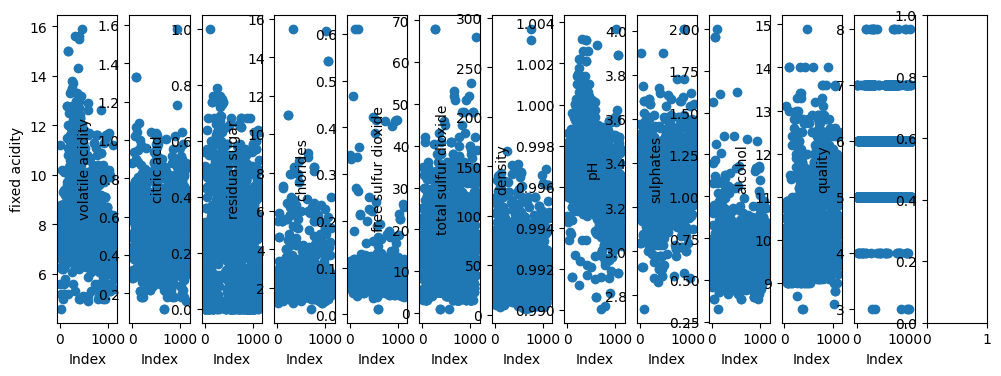

In [41]:
Dataprocessing.Outliers(dataset)

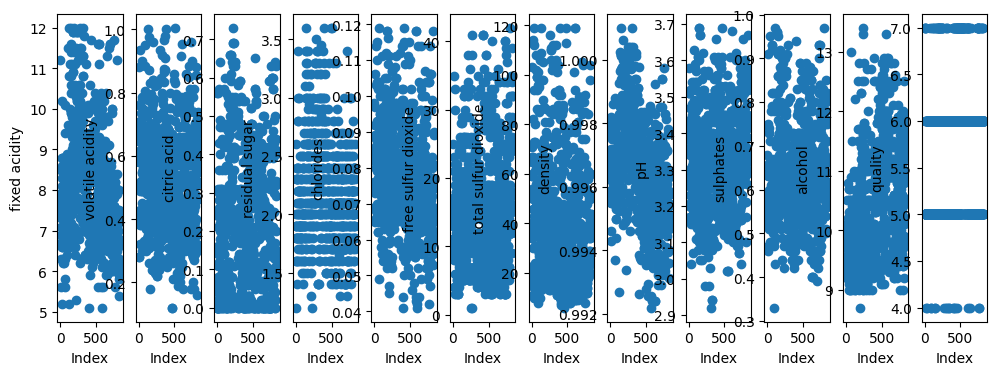

5.0    362
6.0    359
7.0     94
4.0     19
Name: quality, dtype: int64

In [67]:
Dataprocessing.remove_outliers(dataset,"Id")["quality"].value_counts()



In [122]:
Dataprocessing.imbalanced_data(dataset)["quality"].value_counts()

KeyError: ignored

In [120]:
dataset = Dataprocessing.checknull("/content/sample_data/WineQT.csv")

column fixed acidity doesn't cointain null value
column volatile acidity doesn't cointain null value
column citric acid doesn't cointain null value
column residual sugar doesn't cointain null value
column chlorides doesn't cointain null value
column free sulfur dioxide doesn't cointain null value
column total sulfur dioxide doesn't cointain null value
column density doesn't cointain null value
column pH doesn't cointain null value
column sulphates doesn't cointain null value
column alcohol doesn't cointain null value
column quality doesn't cointain null value
column Id doesn't cointain null value


In [114]:
column =dataset.columns.to_list()
# column.pop()

In [115]:
print(column)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']
